In [1]:
import numpy as np
import pandas as pd
import plotnine as pt

In [2]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([1,3,5,7,9,11,13])
z = np.array([2,4,6,8,10,12,14])
df = pd.DataFrame({"x":x, "y":y})
df['z'] = [2,4,6,8,10,12,14]
df_test = pd.DataFrame({"x":x, "z":z})

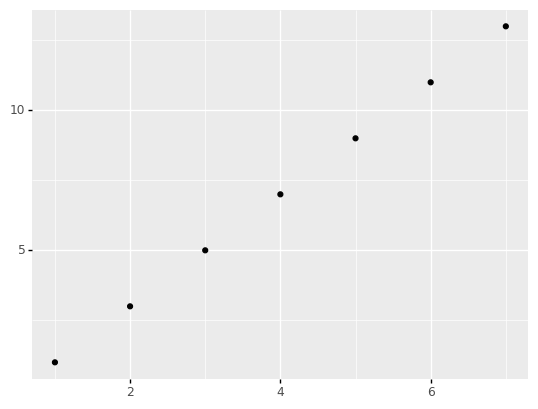

<ggplot: (8766259380258)>

In [3]:
(pt.ggplot() + pt.aes(x = x, y = y) + pt.geom_point())

In [34]:
#Least Squares Method

def linear_simple(x,y):
    ysum = sum(y)
    xsum = sum(x)
    ymean = ysum/len(y)
    xmean = xsum/len(x)
    yxsum = sum(x*y)
    xsquaredsum = sum(x**2)
    extracted = ysum*xsum/len(x)
    botextracted = (xsum**2)/len(x)
    slope = (yxsum-extracted)/(xsquaredsum - botextracted)
    intercept = ymean - slope * xmean
    return f"intercept: {intercept}, slope: {slope}"

In [35]:
linear_simple(x,y)

'intercept: -1.0, slope: 2.0'

In [78]:
#Gradient Descent for 1 indep, 1 dep variable
def linear_simple_gradient(x,y,learning_rate,epochs):
    intercept = slope = 0
    intercept_steps = []
    slope_steps = []
    difference_intercept = []
    difference_slope = []
    for i in range(epochs):
        y_pred = intercept + slope * x 
        int_der = -2 * sum(y - y_pred) / len(x) #MSE derivative for intercept
        slope_der = -2 * sum(x * (y - y_pred)) / len(x) #MSE derivative for slope
        stepsize_int = learning_rate * int_der
        stepsize_slope = learning_rate * slope_der
        intercept_steps.append(stepsize_int)
        slope_steps.append(stepsize_slope)
        intercept = intercept - stepsize_int
        slope = slope - stepsize_slope
        difference_intercept.append(-1 - intercept)
        difference_slope.append(2 - slope)
    intercept_steps = pd.DataFrame({"x":intercept_steps})
    slope_steps = pd.DataFrame({"x":slope_steps})
    difference_intercept = pd.DataFrame({"x":difference_intercept})
    difference_slope = pd.DataFrame({"x":difference_slope})
    a = (pt.ggplot(intercept_steps) + 
         pt.aes(intercept_steps.index.values.tolist(), "x") + 
         pt.geom_line() + 
         pt.ylab("Step_size Intercept") +
         pt.xlab("Progression")
    )
    b = (pt.ggplot(difference_intercept) + 
         pt.aes(intercept_steps.index.values.tolist(), "x") + 
         pt.geom_line() + 
         pt.ylab("Difference from real Intercept") +
         pt.xlab("Progression")
    )
    c = (pt.ggplot(slope_steps) + 
         pt.aes(slope_steps.index.values.tolist(), "x") + 
         pt.geom_line() + 
         pt.ylab("Step_size") +
         pt.xlab("Progression")
    )
    d = (pt.ggplot(difference_slope) + 
         pt.aes(slope_steps.index.values.tolist(), "x") + 
         pt.geom_line() + 
         pt.ylab("Difference from real Slope") +
         pt.xlab("Progression")
    )
    return f"intercept: {intercept:.2f}, slope: {slope:.2f}", a, b,c,d

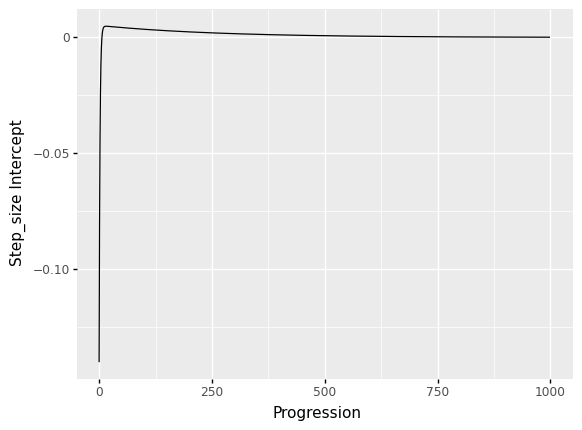

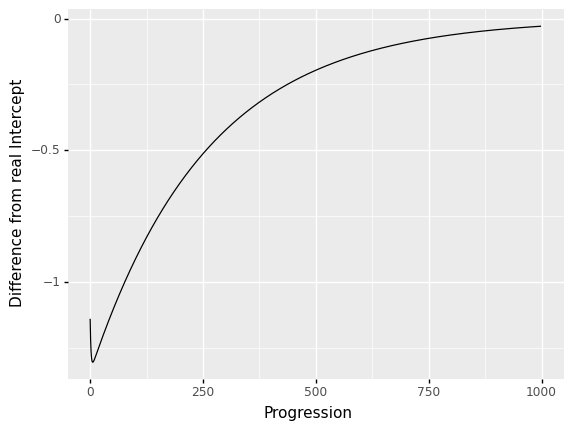

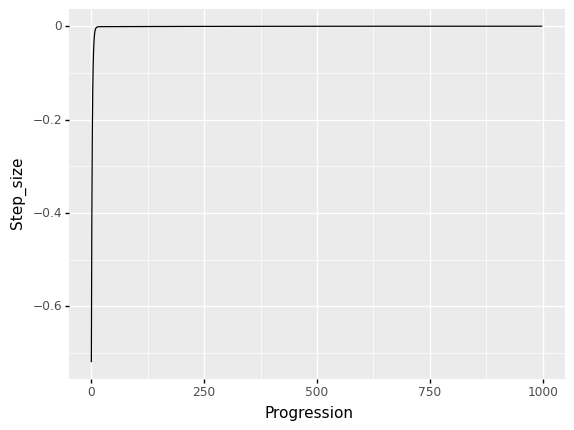

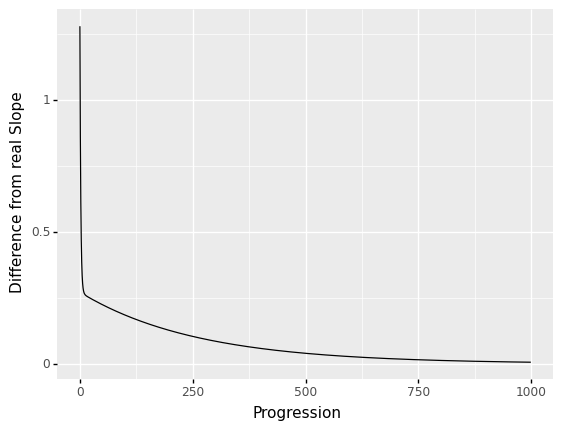

('intercept: -0.97, slope: 1.99',
 <ggplot: (8770107895486)>,
 <ggplot: (8770109555791)>,
 <ggplot: (8770110215554)>,
 <ggplot: (8770110245268)>)

In [79]:
linear_simple_gradient(x,y,0.01,1000)

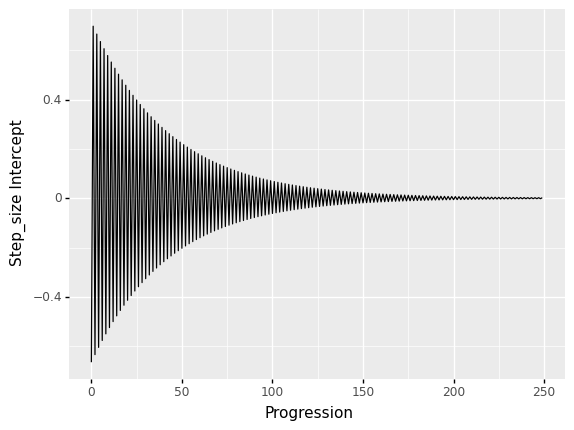

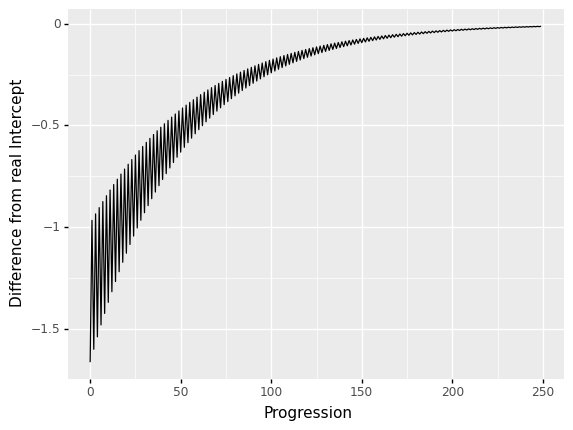

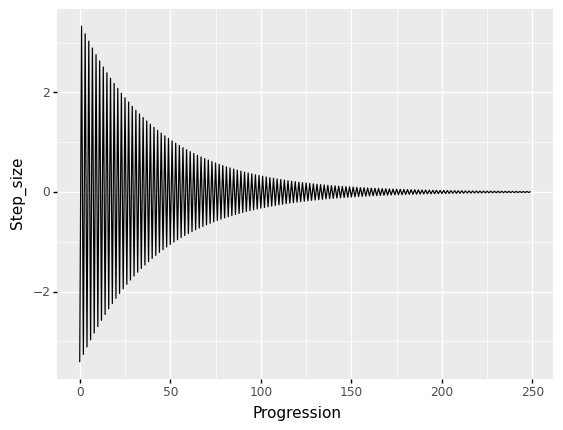

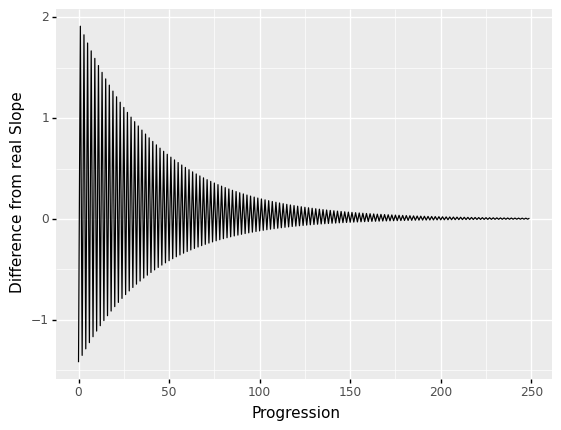

('intercept: -0.99, slope: 1.99',
 <ggplot: (8770107806169)>,
 <ggplot: (8770109983982)>,
 <ggplot: (8770107704968)>,
 <ggplot: (8770110072432)>)

In [80]:
linear_simple_gradient(x,y,0.0475,250)

In [189]:
#Gradient Descent for inifinite indep, 1 dep variable (pek olmadı galiba xD)
def linear_multiple_gradient(df,dependant,learning_rate,epochs):
    intercept = 0
    slopes = [0 for i in range(len(df.columns)-1)]
    dep = df[f'{dependant}']
    df = df.drop(f"{dependant}", axis=1)
    rows = np.array([df[f"{k}"][j] for j in range(len(df)) for k in df]).reshape(len(df),len(df.columns))
    for i in range(epochs):
        y_pred = intercept + sum([i*slopes for i in rows]).sum()
        int_der = -2 * sum(dep - y_pred) / len(df) #MSE derivative for intercept
        slope_der = [-2 * sum(df[f"{x}"] * (dep - y_pred)) / len(df) for x in df] #MSE derivative for slope
        intercept = intercept - learning_rate * int_der
        slopes = np.array(slopes) - learning_rate * np.array(slope_der)
    return [intercept, slopes]
# Will try again :/

In [190]:
linear_multiple_gradient(df, "y", 0.01, 100)

[-1.4131789575201055e+99, array([-5.65271583e+099, -1.13054317e+100])]

In [119]:
def polynomial_linear_reg(x,y,z,learning_rate=0.01,epochs=200,degree=2):
    x = np.array([x,z]).T
    x_vec = np.array([i for i in range(1, degree+1)])
    intercept = -1
    slopes = np.zeros(len(x_vec))
    for i in range(epochs):
        preds = intercept + np.dot([np.power(i,x_vec) for i in x], slopes)
        slopes = slopes - learning_rate * (1/len(x)) * (x.T @ ((x @ slopes) - y))
    return slopes, preds